+#DESCRIPTION


The Chatbot Song Recommendation System is an intelligent conversational agent designed to provide personalized music recommendations. Leveraging the extensive Spotify dataset, this chatbot can analyze user preferences, mood, and context to suggest songs, albums, and artists that match the user's tastes.

#UPLOADING DATASET

In [ ]:

from google.colab import files


uploaded = files.upload()

Saving cleaned_dataset[1].csv to cleaned_dataset[1].csv


#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


#LOADING THE DATASET



In [ ]:
tracks = pd.read_csv('cleaned_dataset[1].csv')
tracks.head()


,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


In [ ]:
tracks.shape


(20594, 24)

In [ ]:
tracks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20594 non-null  object 
 1   Track             20594 non-null  object 
 2   Album             20594 non-null  object 
 3   Album_type        20594 non-null  object 
 4   Danceability      20594 non-null  float64
 5   Energy            20594 non-null  float64
 6   Loudness          20594 non-null  float64
 7   Speechiness       20594 non-null  float64
 8   Acousticness      20594 non-null  float64
 9   Instrumentalness  20594 non-null  float64
 10  Liveness          20594 non-null  float64
 11  Valence           20594 non-null  float64
 12  Tempo             20594 non-null  float64
 13  Duration_min      20594 non-null  float64
 14  Title             20594 non-null  object 
 15  Channel           20594 non-null  object 
 16  Views             20594 non-null  float6

# DATA PREPROCESSING


In [ ]:

import pandas as pd

# Load the dataset
data = pd.read_csv("cleaned_dataset[1].csv")

# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Remove rows with missing values (if any)
data.dropna(inplace=True)



# Convert categorical variables to numerical values (if any)


# Perform any additional preprocessing steps

data.to_csv('preprocessed_data.csv', index=False)


Missing Values:
Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_min        0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
EnergyLiveness      2
most_playedon       0
dtype: int64


# IDENTIFYING THE MISSING DATA

Identify and address missing or incomplete data. Common strategies include imputation (using mean, median, or mode) or removal of incomplete records if they are not critical.

In [ ]:
tracks.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_min        0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
EnergyLiveness      2
most_playedon       0
dtype: int64

In [ ]:
import pandas as pd

# Load the dataset
tracks = pd.read_csv("cleaned_dataset.csv")

# Check if the 'Views' column exists
if 'Views' not in tracks.columns:
    # Create the 'Views' column
    tracks['Views'] = pd.Series([0] * len(tracks))

# Convert the 'Views' column to a categorical variable
tracks['Views'] = tracks['Views'].astype('category')

# Save the preprocessed data
tracks.to_csv('preprocessed_data.csv', index=False)

In [ ]:
# Print the unique values in the 'Views' column
print(tracks['Views'].unique())

# Print the frequency of each unique value
print(tracks['Views'].value_counts())



[693555221.0, 72011645.0, 8435055.0, 211754952.0, 618480958.0, ..., 71678.0, 164741.0, 35646.0, 6533.0, 158697.0]
Length: 19123
Categories (19123, float64): [0.0, 2.0, 7.0, 8.0, ..., 5.773798e+09, 5.908398e+09, 8.079647e+09,
                              8.079649e+09]
Views
0.0             470
21912.0          10
1012205556.0     10
433396.0         10
13099675.0       10
               ... 
4275822.0         1
4275672.0         1
4275129.0         1
4272505.0         1
8079649362.0      1
Name: count, Length: 19123, dtype: int64


In [ ]:
tracks.duplicated().sum()

0

In [ ]:
tracks.EnergyLiveness.dropna(inplace=True)

In [ ]:
tracks.columns


Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_min', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream',
       'EnergyLiveness', 'most_playedon'],
      dtype='object')

In [ ]:
data =tracks.drop(['Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_min',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream',
       'EnergyLiveness' ], axis=1)

In [ ]:
def tags_create(text):
    text = text.replace(' ', '')
    return text

In [ ]:
data.Album = data.Album.apply(tags_create)
data.Title = data.Title.apply(tags_create)


In [ ]:
tags = data.Artist + ' '+ data.Album +' '+ data.Album_type +' '+ data.Title + ' '+ data.Channel + ' '+ data.most_playedon

In [ ]:
data['tags'] = tags


In [ ]:
data.drop(['Artist', 'Album', 'Album_type', 'Title', 'Channel', 'most_playedon'], axis=1, inplace=True)


In [ ]:
data.head(3)


,Track,tags
0,Feel Good Inc.,Gorillaz DemonDays album Gorillaz-FeelGoodInc....
1,Rhinestone Eyes,Gorillaz PlasticBeach album Gorillaz-Rhineston...
2,New Gold (feat. Tame Impala and Bootie Brown),Gorillaz NewGold(feat.TameImpalaandBootieBrown...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')


In [ ]:
vector = cv.fit_transform(data['tags']).toarray()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
data[data['Track'] == 'Fix You'].index[0]


49

#DATA VISUALIZIATION TECHINQUES

#HISTPLOT

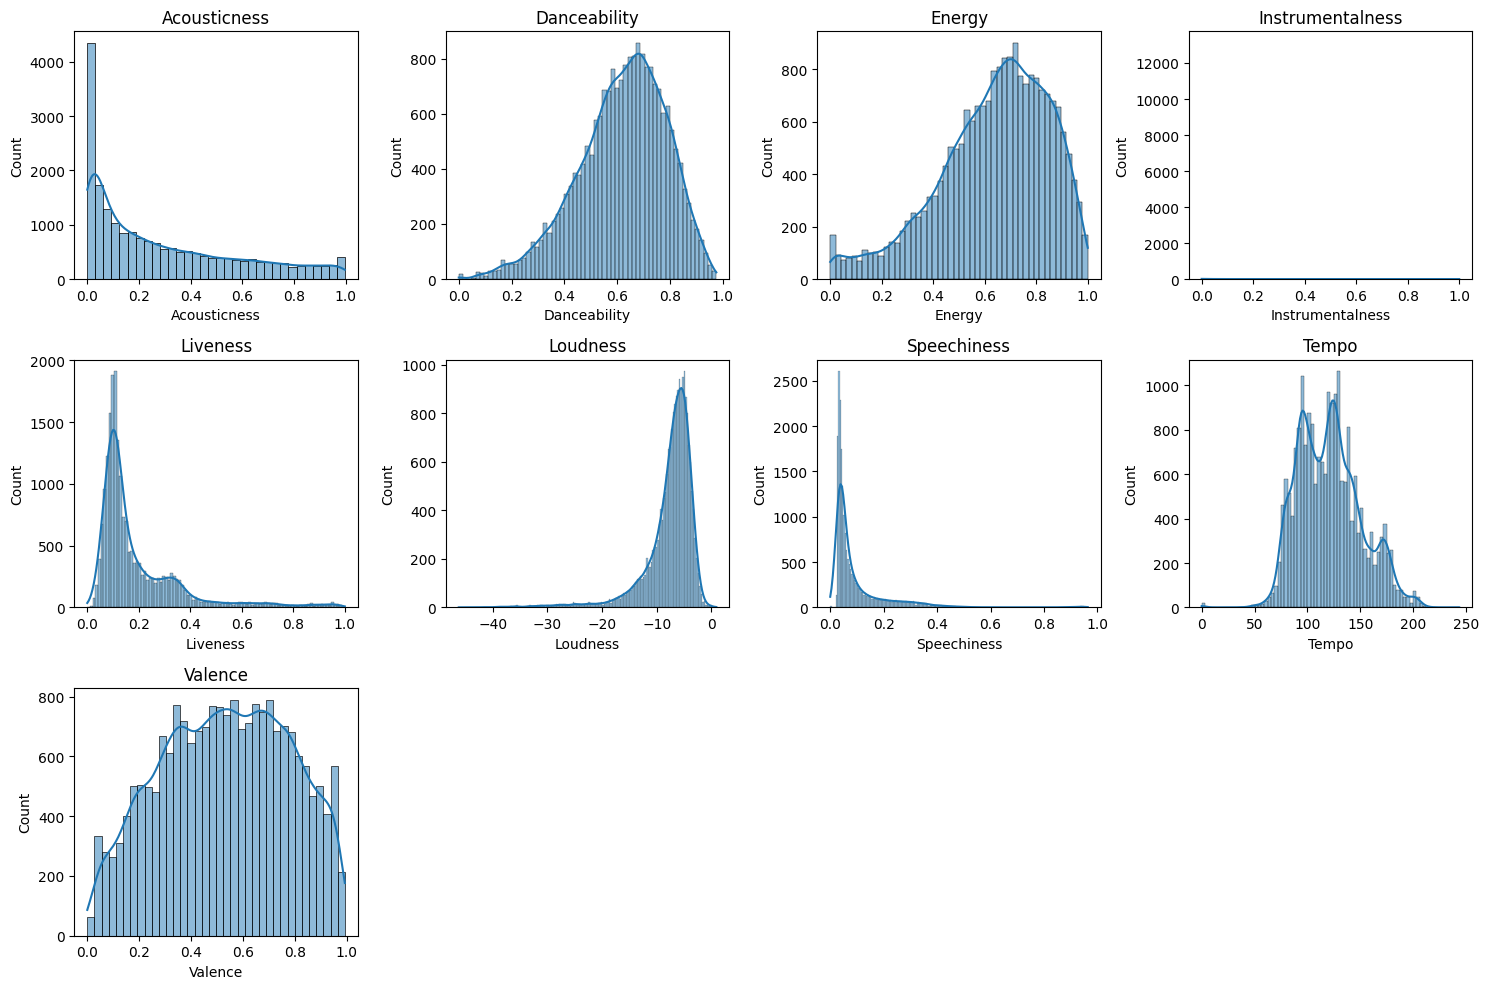

In [ ]:
desc_stats = tracks.describe()

# Data Visualization - Plotting a histogram of some features
features_to_plot = ['Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 4, i)
    sns.histplot(tracks[feature], kde=True)
    plt.title(feature)

plt.tight_layout()

#BAR CHART

In [ ]:
top10_genres = tracks.nlargest(10, 'Likes')


fig = px.bar(top10_genres, x='Likes', y=['Valence', 'Energy', 'Danceability', 'Acousticness'], barmode='group')
fig.show()

In [ ]:
import plotly.express as px

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

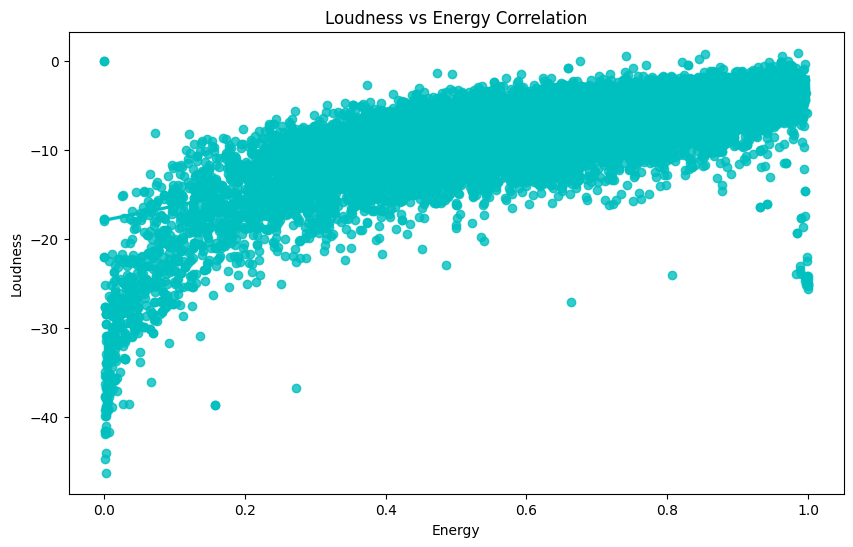

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=tracks, y='Loudness', x='Energy', color='c').set(title='Loudness vs Energy Correlation')


#SCATTER PLOT

In [ ]:
# Interactive visualization using plotly
import plotly.express as px
fig = px.scatter(tracks, x='Danceability', y='Energy', color='most_playedon', hover_data=['Artist', 'Title'])
fig.show()


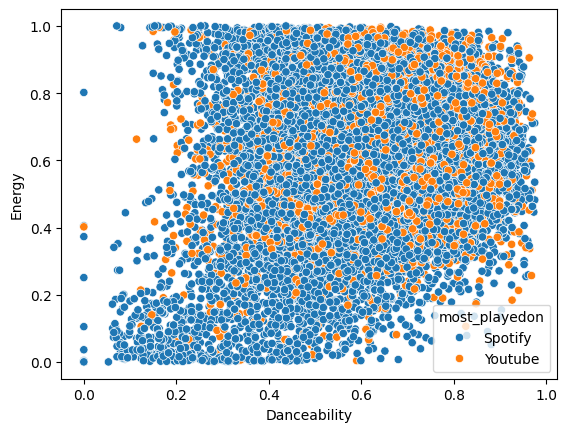

In [ ]:
# Scatter plot with multiple variables
sns.scatterplot(x='Danceability', y='Energy', hue='most_playedon', data=tracks)
plt.show()

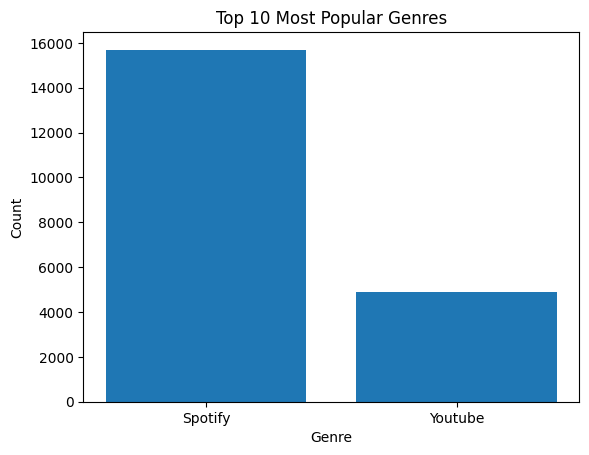

In [ ]:
# Most popular genres
top_genres = tracks['most_playedon'].value_counts().head(10)
plt.bar(top_genres.index, top_genres.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Most Popular Genres')
plt.show()


#BOX PLOT

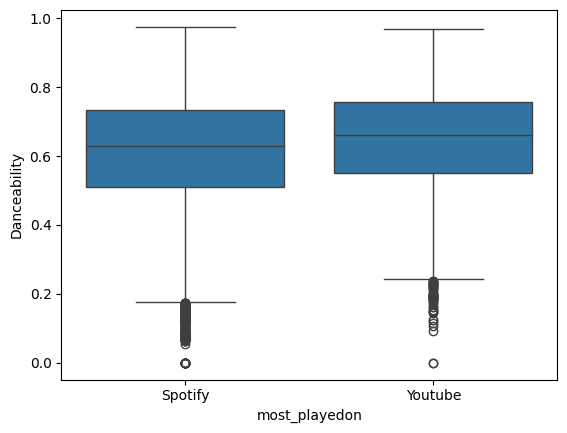

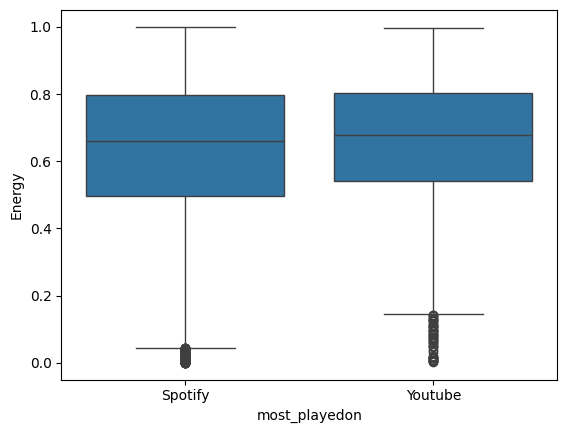

In [ ]:
# Relationship between categorical and numerical variables
sns.boxplot(x='most_playedon', y='Danceability', data=tracks)
plt.show()
sns.boxplot(x='most_playedon', y='Energy', data=tracks)
plt.show()

#HEATMAP

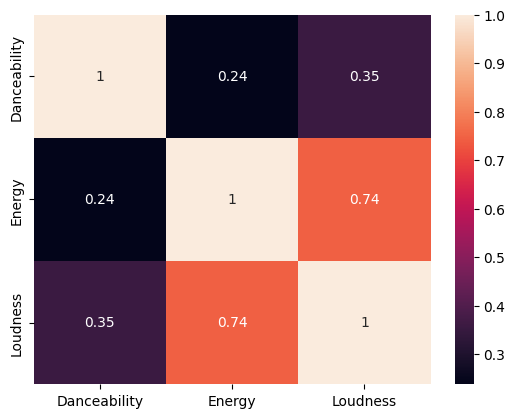

In [ ]:
# Correlation between numerical variables
corr = tracks[['Danceability', 'Energy', 'Loudness']].corr()
sns.heatmap(corr, annot=True)
plt.show()

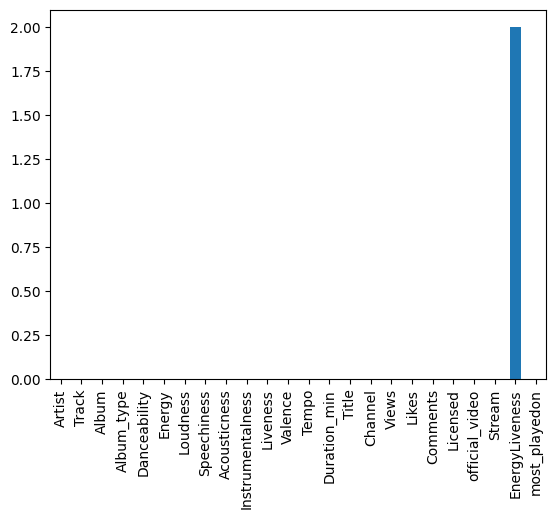

In [ ]:
# Check for missing values
tracks.isnull().sum().plot.bar()
plt.show()

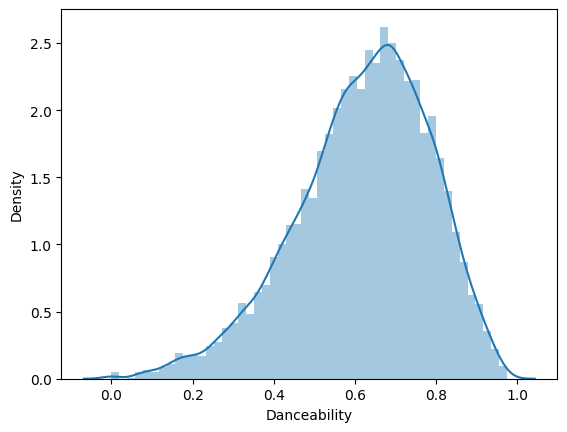

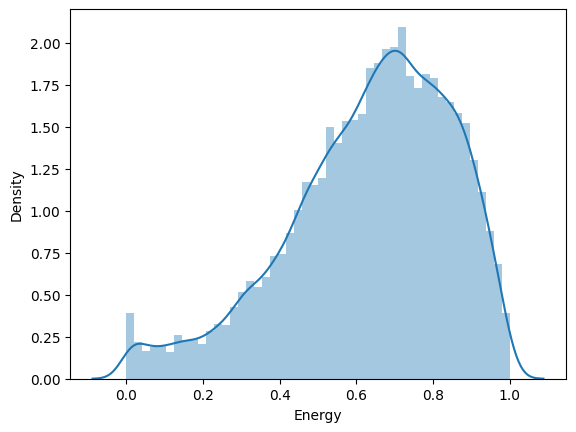

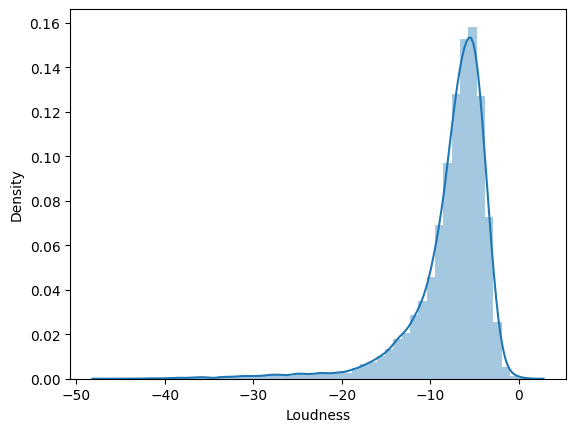

In [ ]:
# Distribution of numerical variables
sns.distplot(tracks['Danceability'])
plt.show()
sns.distplot(tracks['Energy'])
plt.show()
sns.distplot(tracks['Loudness'])
plt.show()

#DECISION TREE

In [ ]:
#Decision tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np

In [ ]:
features = ['Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_min']
target = 'Title'

# Creating feature set and target variable
X = tracks[features]
y = tracks[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
depths = np.arange(10, 31, 5)
splits = [2, 5, 10, 15]

# Define the hyperparameter distributions
param_dist = {
    'max_depth': depths,
    'min_samples_split': splits,
    # Add more parameters to tune
}

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)


In [ ]:
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Use the best estimator for prediction and evaluation
y_pred = best_estimator.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Decision Tree Accuracy with Best Estimator:", accuracy)


Best Parameters: {'min_samples_split': 2, 'max_depth': 30}
Decision Tree Accuracy with Best Estimator: 0.04321437242049041


#MODEL TESTING

In [ ]:
#testing
def recommend(song):

    index = data[data['Track'] == song].index[0] # Fetching the index number of song in dataframe
    similarity_list = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in similarity_list[1:6]:
        print(data.iloc[i[0]].Track)

In [ ]:
recommend('Fix You')
#testing


Viva La Vida
A Sky Full of Stars
Fix You
My Universe
The Scientist


#CONCLUSION

Developing a chatbot for song recommendation using the Spotify dataset involves a meticulous blend of data preprocessing, feature extraction, machine learning, and user interaction design. By leveraging advanced AI and machine learning tools, we can create a system that delivers personalized and accurate song recommendations to users.
By analyzing input such as genre, mood, and favorite artists, our algorithm generates tailored recommendations. Users receive a list of suggested songs, and their feedback helps refine future recommendations. With continuous updates and potential future enhancements, we strive to provide an even more refined and enjoyable music recommendation service for all users.



